In [34]:
import pandas as pd

data = pd.read_csv('./producers-best-ratings.csv', sep=';')
# data = data.loc[(data['type'] == 'James Suckling') | (data['type'] == 'Jeb Dunnuck') | (data['type'] == 'Robert Parker')]

data.head()

,producer,type,rating_avg
238,Beaulieu Vineyard,James Suckling,100.0
239,Fattoria Le Pupille,James Suckling,99.0
240,Duemani,James Suckling,99.0
241,Chateau Cos Destournel,James Suckling,99.0
242,Chateau Pontet Canet,James Suckling,99.0


In [35]:
types = data['type'].unique().tolist()
producers = data['producer'].unique().tolist()

ratings = {}
for producer in producers:
    rating = []
    for type_name in types:
        value = data.loc[(data['producer'] == producer) & (data['type'] == type_name)]
        if len(value):
            rating.append(value['rating_avg'].values[0])
        else:
            rating.append(None)
    ratings[producer] = rating

In [193]:
# Encontrar os 5 maiores valores para cada tipo de avaliação (category)
top_producers = {t: [] for t in types}
for i, t in enumerate(types):
    ratings_per_type = {producer: ratings[producer][i] for producer in producers if ratings[producer][i] is not None}
    sorted_producers = sorted(ratings_per_type, key=lambda x: ratings_per_type[x], reverse=True)[:5]
    top_producers[t] = sorted_producers

In [194]:
import numpy as np

def normalize(matrix):
    # Substitui os valores "None" por NaN
    matrix = np.where(matrix == None, np.nan, matrix.astype(float))

    # Encontra os valores mínimo e máximo para cada coluna desconsiderando os NaNs
    min_vals = np.nanmin(matrix, axis=0)
    max_vals = np.nanmax(matrix, axis=0)

    # Faz a escala min-max para cada coluna, desconsiderando os NaNs
    diff = max_vals - min_vals
    diff[diff == 0] = 1  # Substitui diferenças iguais a zero por 1
    return (matrix - min_vals) / diff

matrix = np.zeros((len(producers), len(types)))

for i, producer in enumerate(producers):
    matrix[i, :] = [v if producer in list(top_producers.values())[j] else None for j, v in enumerate(ratings[producer])]

matrix = normalize(matrix)

for i, producer in enumerate(producers):
    prod_values = matrix[i,:]
    matrix[i,:] = [y+0.08*(np.count_nonzero(matrix[:,j] == prod_values[j])-1) if y is not None else y for j, y in enumerate(prod_values)]

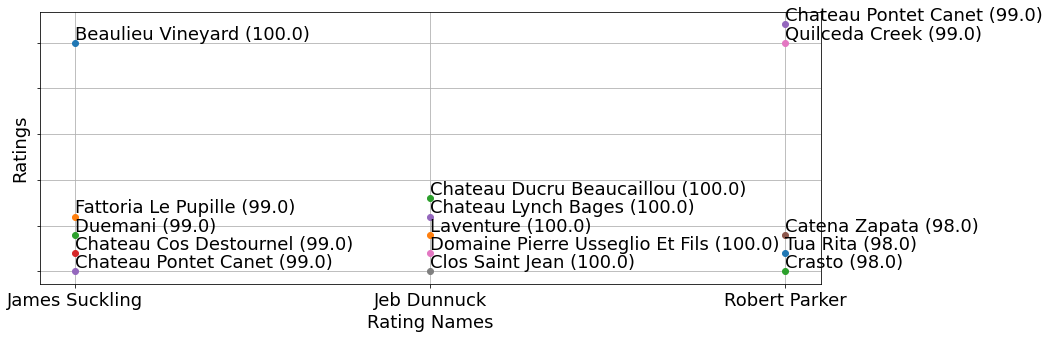

In [198]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.rcParams.update({'font.size': 18})

# Preparando os dados para plotagem
x_values = types  # Eixo x com os nomes das avaliações
for i, producer in enumerate(producers):
    y_values = matrix[i,:]
    plt.plot(x_values, y_values, marker='o', label=producer)
    for j, (x, y) in enumerate(zip(x_values, y_values)):
        if not np.isnan(y):
            plt.text(x, y, f"{producer} ({ratings[producer][j]:.1f})", ha='left', va='bottom')  # Adicionando texto ao lado dos pontos
            
# Configurações do gráfico
plt.xlabel('Rating Names')
plt.ylabel('Ratings')
plt.gca().set_yticklabels([])
plt.xticks(types)  # Define os valores do eixo x como os tipos de avaliação
plt.grid(True)

# Exibe o gráfico
plt.show()